In [134]:
#Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import datetime

import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')

from matplotlib.pyplot import figure
%matplotlib inline

#Adjust configuration of the plots to create

matplotlib.rcParams['figure.figsize']=(12,8)

#Read the data to use for the project

df=pd.read_csv(r'C:\Users\User\Downloads\movies.csv')


In [98]:
#Get a quick look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [99]:
# Look for missing data

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} = {}%'.format(col,percent_missing))

name = 0.0%
rating = 0.010041731872717789%
genre = 0.0%
year = 0.0%
released = 0.0002608242044861763%
score = 0.0003912363067292645%
votes = 0.0003912363067292645%
director = 0.0%
writer = 0.0003912363067292645%
star = 0.00013041210224308815%
country = 0.0003912363067292645%
budget = 0.2831246739697444%
gross = 0.02464788732394366%
company = 0.002217005738132499%
runtime = 0.0005216484089723526%


In [100]:
#We see some missing data, as movies are not a very uniform media, instead of data replacement... 
# ...methods is better to drop the data
df=df.dropna()

In [101]:
# Checking for the data types of our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [110]:
#We change gross revenue and budget data type from float to int cause the numbers are usually in the millions
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [148]:
#Inspecting the data we can see the year in the 'release' and 'year' column don't match, so we fix that with...
# ... a new column that just extracts the year from the 'release' column

def split_country(date):
    no_country=date.split(' (')[0]
    return no_country

df['CorrectYear'] = df['released'].astype(str).apply(split_country).str[-4:].copy()
df['CorrectYear'].head()

0    1980
1    1980
2    1980
3    1980
4    1980
Name: CorrectYear, dtype: object

In [149]:
#We order the data by gross Revenue to see the most important films
df = df.sort_values(by=['gross'],inplace=False,ascending=False)
df[['name','gross']].head()

,name,gross
5445,Avatar,2.847246e+09
7445,Avengers: Endgame,2.797501e+09
3045,Titanic,2.201647e+09
6663,Star Wars: Episode VII - The Force Awakens,2.069522e+09
7244,Avengers: Infinity War,2.048360e+09


In [113]:
#Check for duplicates
duplicates = df.duplicated()
duplicate_summary=duplicates.value_counts()

print('Duplicate summary:')
duplicate_summary

Duplicate summary:


False    5421
Name: count, dtype: int64

In [114]:
#We state a couple of hypothesis
#Budget correlates positively with gross revenue, i.e, the higher the budget, the higher the gross revenue
#Company correlates with positively with gross revenue, i.e, companies like disney, warner bros, market their movies more...
#... and generally gross more as a result


<function matplotlib.pyplot.show(close=None, block=None)>

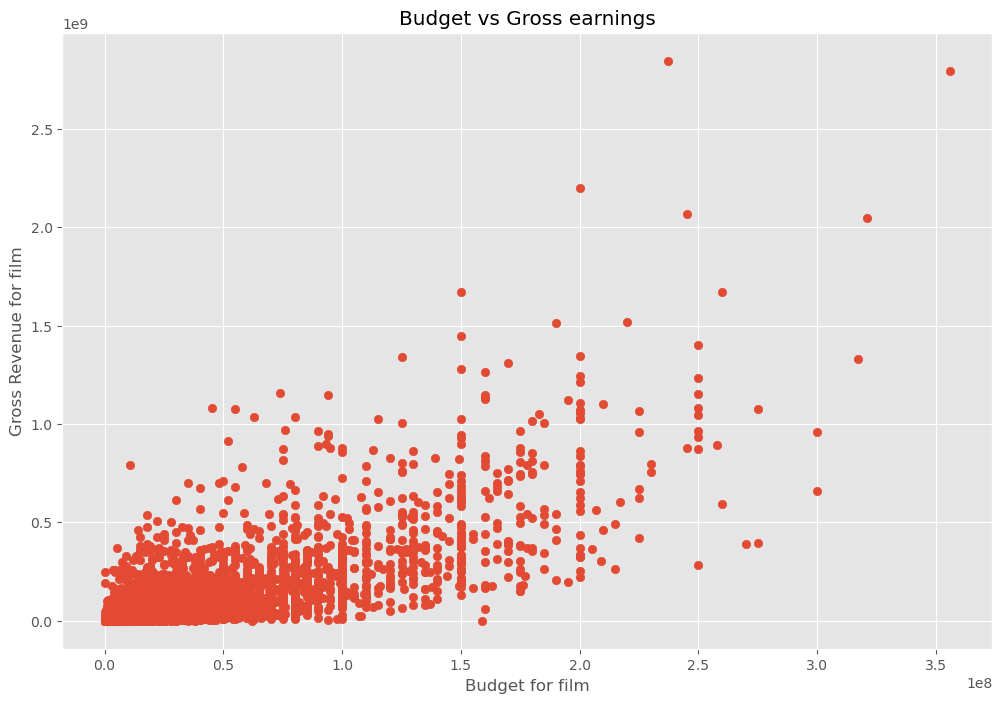

In [115]:
#Scatter plot with budget vs gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross earnings')
plt.xlabel('Budget for film')
plt.ylabel('Gross Revenue for film')
plt.show

<Axes: xlabel='budget', ylabel='gross'>

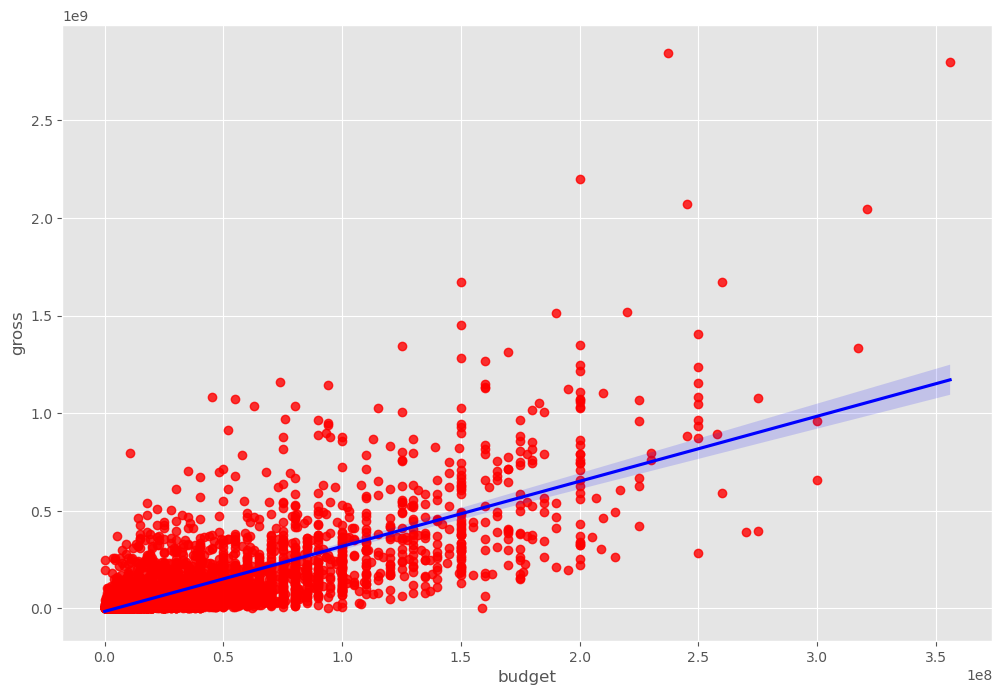

In [116]:
#Check for correlation of budget vs gross
sns.regplot(x='budget',y='gross',data=df, scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [117]:
#Look at a correlation of columns with numerical values
df.select_dtypes(include='number').corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

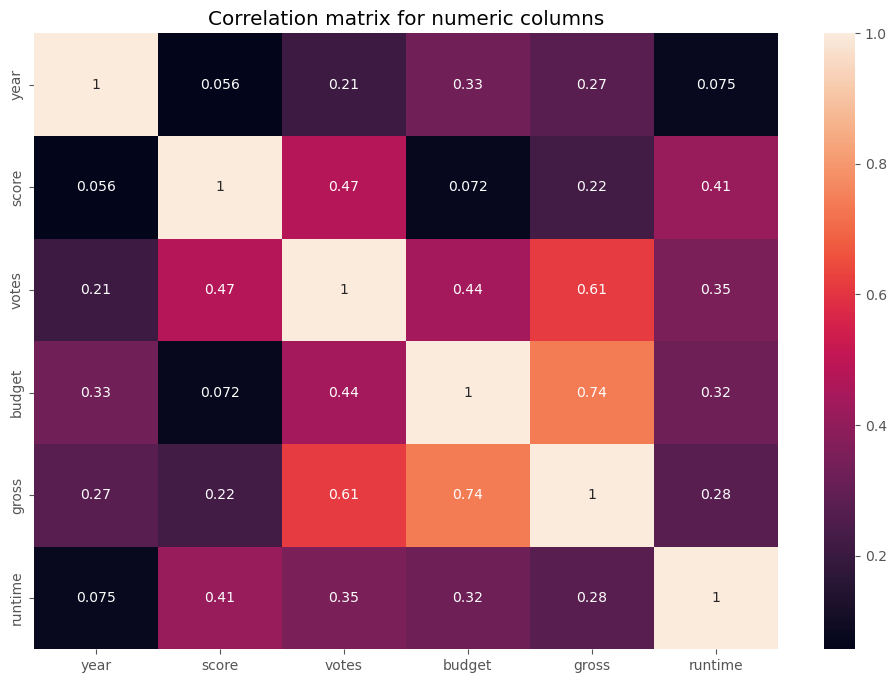

In [79]:
#We can see a high correlation between budget and gross, we visualize it in a correlation matrix
corr_matrix=df.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation matrix for numeric columns')
plt.show

In [150]:
#To check the company correlation with the gross revenue we first need to turn company into a numeric value
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=='object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]= df_numerized[col_name].cat.codes
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,CorrectYear
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0,29
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0,39
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0,17
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0,35
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0,38


In [125]:
corr_mat=df_numerized.corr()
corr_pairs=corr_mat.unstack()
sorted_pairs=corr_pairs.sort_values(ascending=False)
high_corr=sorted_pairs[(sorted_pairs>0.5) & (sorted_pairs!=1)]
high_corr

CorrectYear  year           0.998726
year         CorrectYear    0.998726
budget       gross          0.740247
gross        budget         0.740247
             votes          0.614751
votes        gross          0.614751
dtype: float64

In [126]:
#Votes and budget have the highest correlation to gross earnings
#Company has no correlation

In [136]:
#It would be also interesting to check the top grossing studios
df.groupby('company')['gross'].sum().sort_values(ascending=False).head(10)

company
Warner Bros.             5.649142e+10
Universal Pictures       5.251419e+10
Columbia Pictures        4.300894e+10
Paramount Pictures       4.049361e+10
Twentieth Century Fox    4.025705e+10
Walt Disney Pictures     3.632789e+10
New Line Cinema          1.988380e+10
Marvel Studios           1.506559e+10
DreamWorks Animation     1.187361e+10
Touchstone Pictures      1.179583e+10
Name: gross, dtype: float64

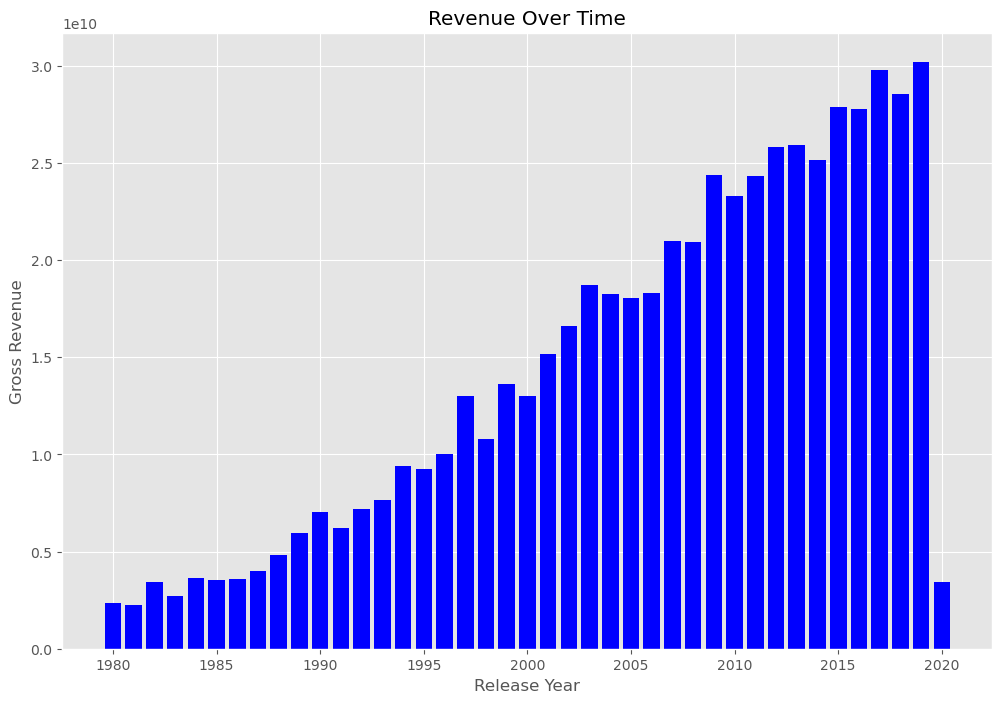

In [147]:
#Finally we make a graph of year of release VS Gross to check for trends over time
df['CorrectYear']=pd.to_datetime(df['CorrectYear'],format='%Y')
yearly_cumulative = df.groupby(df['CorrectYear'].dt.year)['gross'].cumsum()

plt.bar(df['CorrectYear'].dt.year, yearly_cumulative, color='blue')
plt.title('Revenue Over Time')
plt.xlabel('Release Year')
plt.ylabel('Gross Revenue')
plt.grid(True)
plt.show()